[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ved\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ved\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\ved/nltk_data'
    - 'C:\\Users\\ved\\Desktop\\Speech-Completition-Prediction\\.venv\\nltk_data'
    - 'C:\\Users\\ved\\Desktop\\Speech-Completition-Prediction\\.venv\\share\\nltk_data'
    - 'C:\\Users\\ved\\Desktop\\Speech-Completition-Prediction\\.venv\\lib\\nltk_data'
    - 'C:\\Users\\ved\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


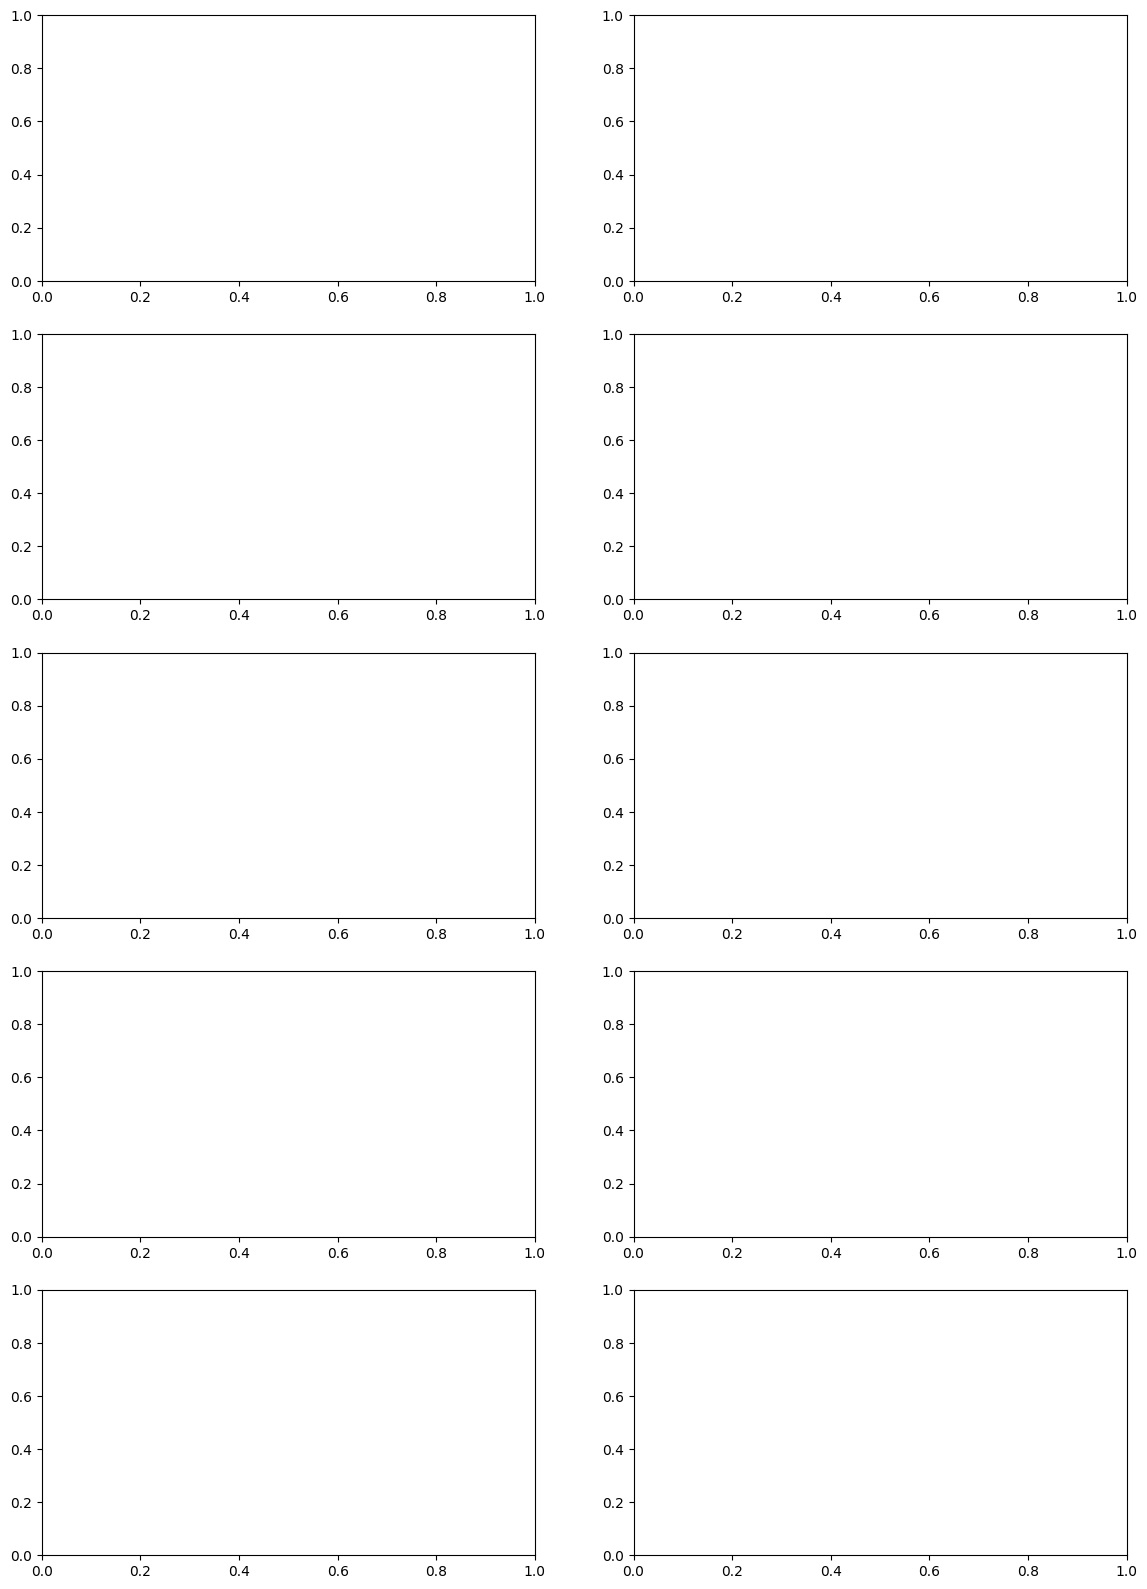

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import random

nltk.download('stopwords')
nltk.download('punkt')
df = pd.read_csv("../../clustering/intermediate_data/clustered_embeddings.csv")
df = df[df["text"].notnull() & df["text"].str.strip().astype(bool)]

stop_words = set(stopwords.words('english'))
stopword_weight = 0.3
num_samples = 10

random_indices = random.sample(range(len(df)), num_samples)
fig, axs = plt.subplots(5, 2, figsize=(14,20))
axs = axs.flatten()

for ax, idx in zip(axs, random_indices):
    row = df.iloc[idx]
    text = row["text"]
    words = word_tokenize(text)
    words_alpha = [w.lower() for w in words if w.isalpha()]

    unique_words = set()
    stopword_count = 0
    total_counts = []
    gain_list = []

    for i, word in enumerate(words_alpha, 1):
        if word in stop_words:
            stopword_count += 1
        else:
            unique_words.add(word)

        gain = len(unique_words) - stopword_weight * stopword_count
        total_counts.append(i)
        gain_list.append(gain)

    ax.plot(total_counts, gain_list, color='purple')
    ax.set_title(f'File {row["file"]} | Cluster {row["cluster"]}', fontsize=10)
    ax.grid(True)
    ax.autoscale()

    textstr = f'Total Words: {len(words_alpha)}\nUnique Words: {len(unique_words)}\nStopwords: {stopword_count}'
    ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=8,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

fig.text(0.5, 0.04, 'Total Words Processed', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Gain Score', va='center', rotation='vertical', fontsize=12)
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])
plt.show()